<img src="imagenes/ia.png", width="200" \>
# Comparación de diferentes clasificadores

[**Julio Waissman Vilanova**](http://mat.uson.mx/~juliowaissman/).

En esta libreta se muestra para 3 conjuntos de datos artificiales bidimensionales, la forma en que se realiza la clasificación con distintos métodos. Principalmente lo hacemos para poder sacar conclusiones sobre en que situaciones un método puede ser mejor que otros, y que está haciendo internamente.

Codigo obtenido de la documentación de scikit-learn, el cual se puede consultar [aquí](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html).

In [1]:
# El de base
import numpy as np

# Las gráficas
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Para separar los datos en entrenamiento y validación
from sklearn.model_selection import train_test_split

# Para normalizar los datos (desviación estandar)
from sklearn.preprocessing import StandardScaler

# Los conjuntos de datos artificiales típicos para probar clasificadores
from sklearn.datasets import make_moons, make_circles, make_classification

# Los métodos de aprendizaje a utilizar
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

%matplotlib inline


## 1. Generando los 3 conjuntos de datos

Dataset: (array([[ 0.03159499,  0.98698776],
       [ 2.11509784, -0.04624397],
       [ 0.88248972, -0.07575606],
       [-0.0551441 , -0.03733246],
       [ 0.82954503, -0.53932149],
       [ 2.11285708,  0.66208353],
       [ 0.5696927 ,  0.33744136],
       [ 0.95217454, -0.75307471],
       [-0.02922115,  0.39287336],
       [ 1.71579557,  0.36069454],
       [-0.27883014,  0.61420539],
       [ 2.00344509, -0.3091496 ],
       [ 1.50009616, -0.74636376],
       [ 1.22540835,  1.19793017],
       [ 0.46730819,  0.54703192],
       [-0.36653222,  1.11971633],
       [ 0.30124459,  1.23315697],
       [ 0.30430746,  0.82373935],
       [-0.23712492,  0.77876034],
       [ 1.16339832,  0.55290238],
       [-0.59702417,  0.6572361 ],
       [ 0.46356735, -0.1951543 ],
       [ 0.68451111,  0.75287685],
       [ 0.70515699, -0.45892444],
       [-0.65805008, -0.12944211],
       [-0.74662946, -0.3829632 ],
       [ 0.60585226,  0.31252842],
       [ 2.18137168, -0.02291747],
       [ 1

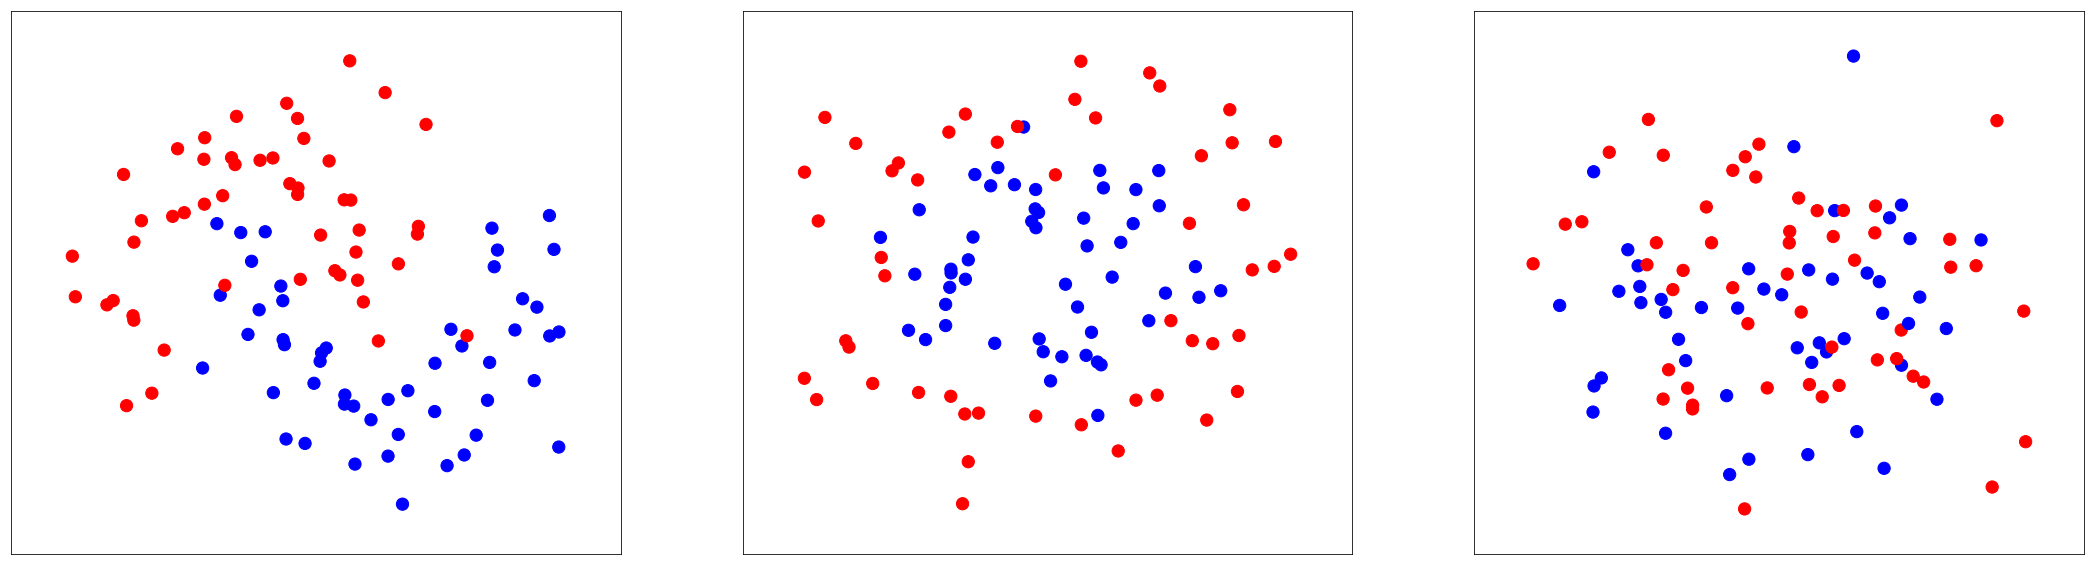

In [9]:
# Del modulo para general conjuntos de datos artificiales, para hacer conjuntos de lunas y circulos:
lunas = make_moons(noise=0.3, random_state=0)
circulos = make_circles(noise=0.2, factor=0.5, random_state=1)

# Ahora generamos un conjunto de datos linealmente separables
## make_classification
# Generate a random n-class classification problem.

X, y = make_classification(n_features=3,#2,          #  Dos dimensiones para poderlos graficar 
                           n_redundant=0,            #  Sin dimensiones redundantes, no nos interesa probar esto ahora
                           n_informative=2,          #  Las dos dimensiones informativas (no correlacionadas)
                           random_state=1,           #  Semilla, siempre la misma para que todos tengan los mismos resultados
                           n_clusters_per_class=1)   #  Una sola forma por clase para hacerlo más sencillo
#print("X sin ruido: {}".format(X))

# Le agregamos ruido a la separación lineal (algunos puntos mal clasificados)
rng = np.random.RandomState(2)           #  Un generados de números pseudoaleatorios con la semilla impuesta

X += 2 * rng.uniform(size=X.shape)       
#  A cada punto se le suma un error con una distribución uniforme en ambas dimensiones

#print("X con ruido: {}".format(X))

lineal = (X, y) # nuestro dataset de datos linealmente separables

datasets = [lunas, circulos, lineal]    # Una lista de tuplas (X, y)

for data in datasets: # quiero ver mis datos
    print("Dataset: {}".format(data))

# Y los graficamos para verlos

figure = plt.figure(figsize=(30, 10)) # matplotlib si dejas de utilizar una figura, close, para limpiar memoria
cm_escala = ListedColormap(['#FF0000', '#0000FF'])

for (i, ds) in enumerate(datasets):

    # Selecciona los valores del conjunto de datos y los escala
    X, y = ds
    X = StandardScaler().fit_transform(X) 

    # Grafica
    ax = plt.subplot(1, 3, i+1)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=150, cmap=cm_escala)
    ax.set_xlim(X[:, 0].min() - .5, X[:, 0].max() + .5)
    ax.set_ylim(X[:, 1].min() - .5, X[:, 1].max() + .5)
    ax.set_xticks(())
    ax.set_yticks(())
figure.subplots_adjust(left=.02, right=.98)    
plt.show()


## 2. Define la bateria de clasificadores

In [3]:
titulos = [u"Vecinos próximos", "SVM lineal", "SVM gaussiano", u"Árbol de desición",
           u"Boseques aleatórios", "AdaBoost", "Naive Bayes", "Discriminante lineal",
           "Discriminante cuadrátco"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]


## 3. Generando la clasificación con cada método diferente

Vamos a generar por cada conjunto de datos datos de entrenamiento y prueba, y aparte vamos a clasificar todos los datos dentro del meshgrid, para asignarles colores en el fondo, que nos permitan visualizar el tipo de particiones del plano que se genera con cada uno de los métodos de clasificación

Base de datos 0


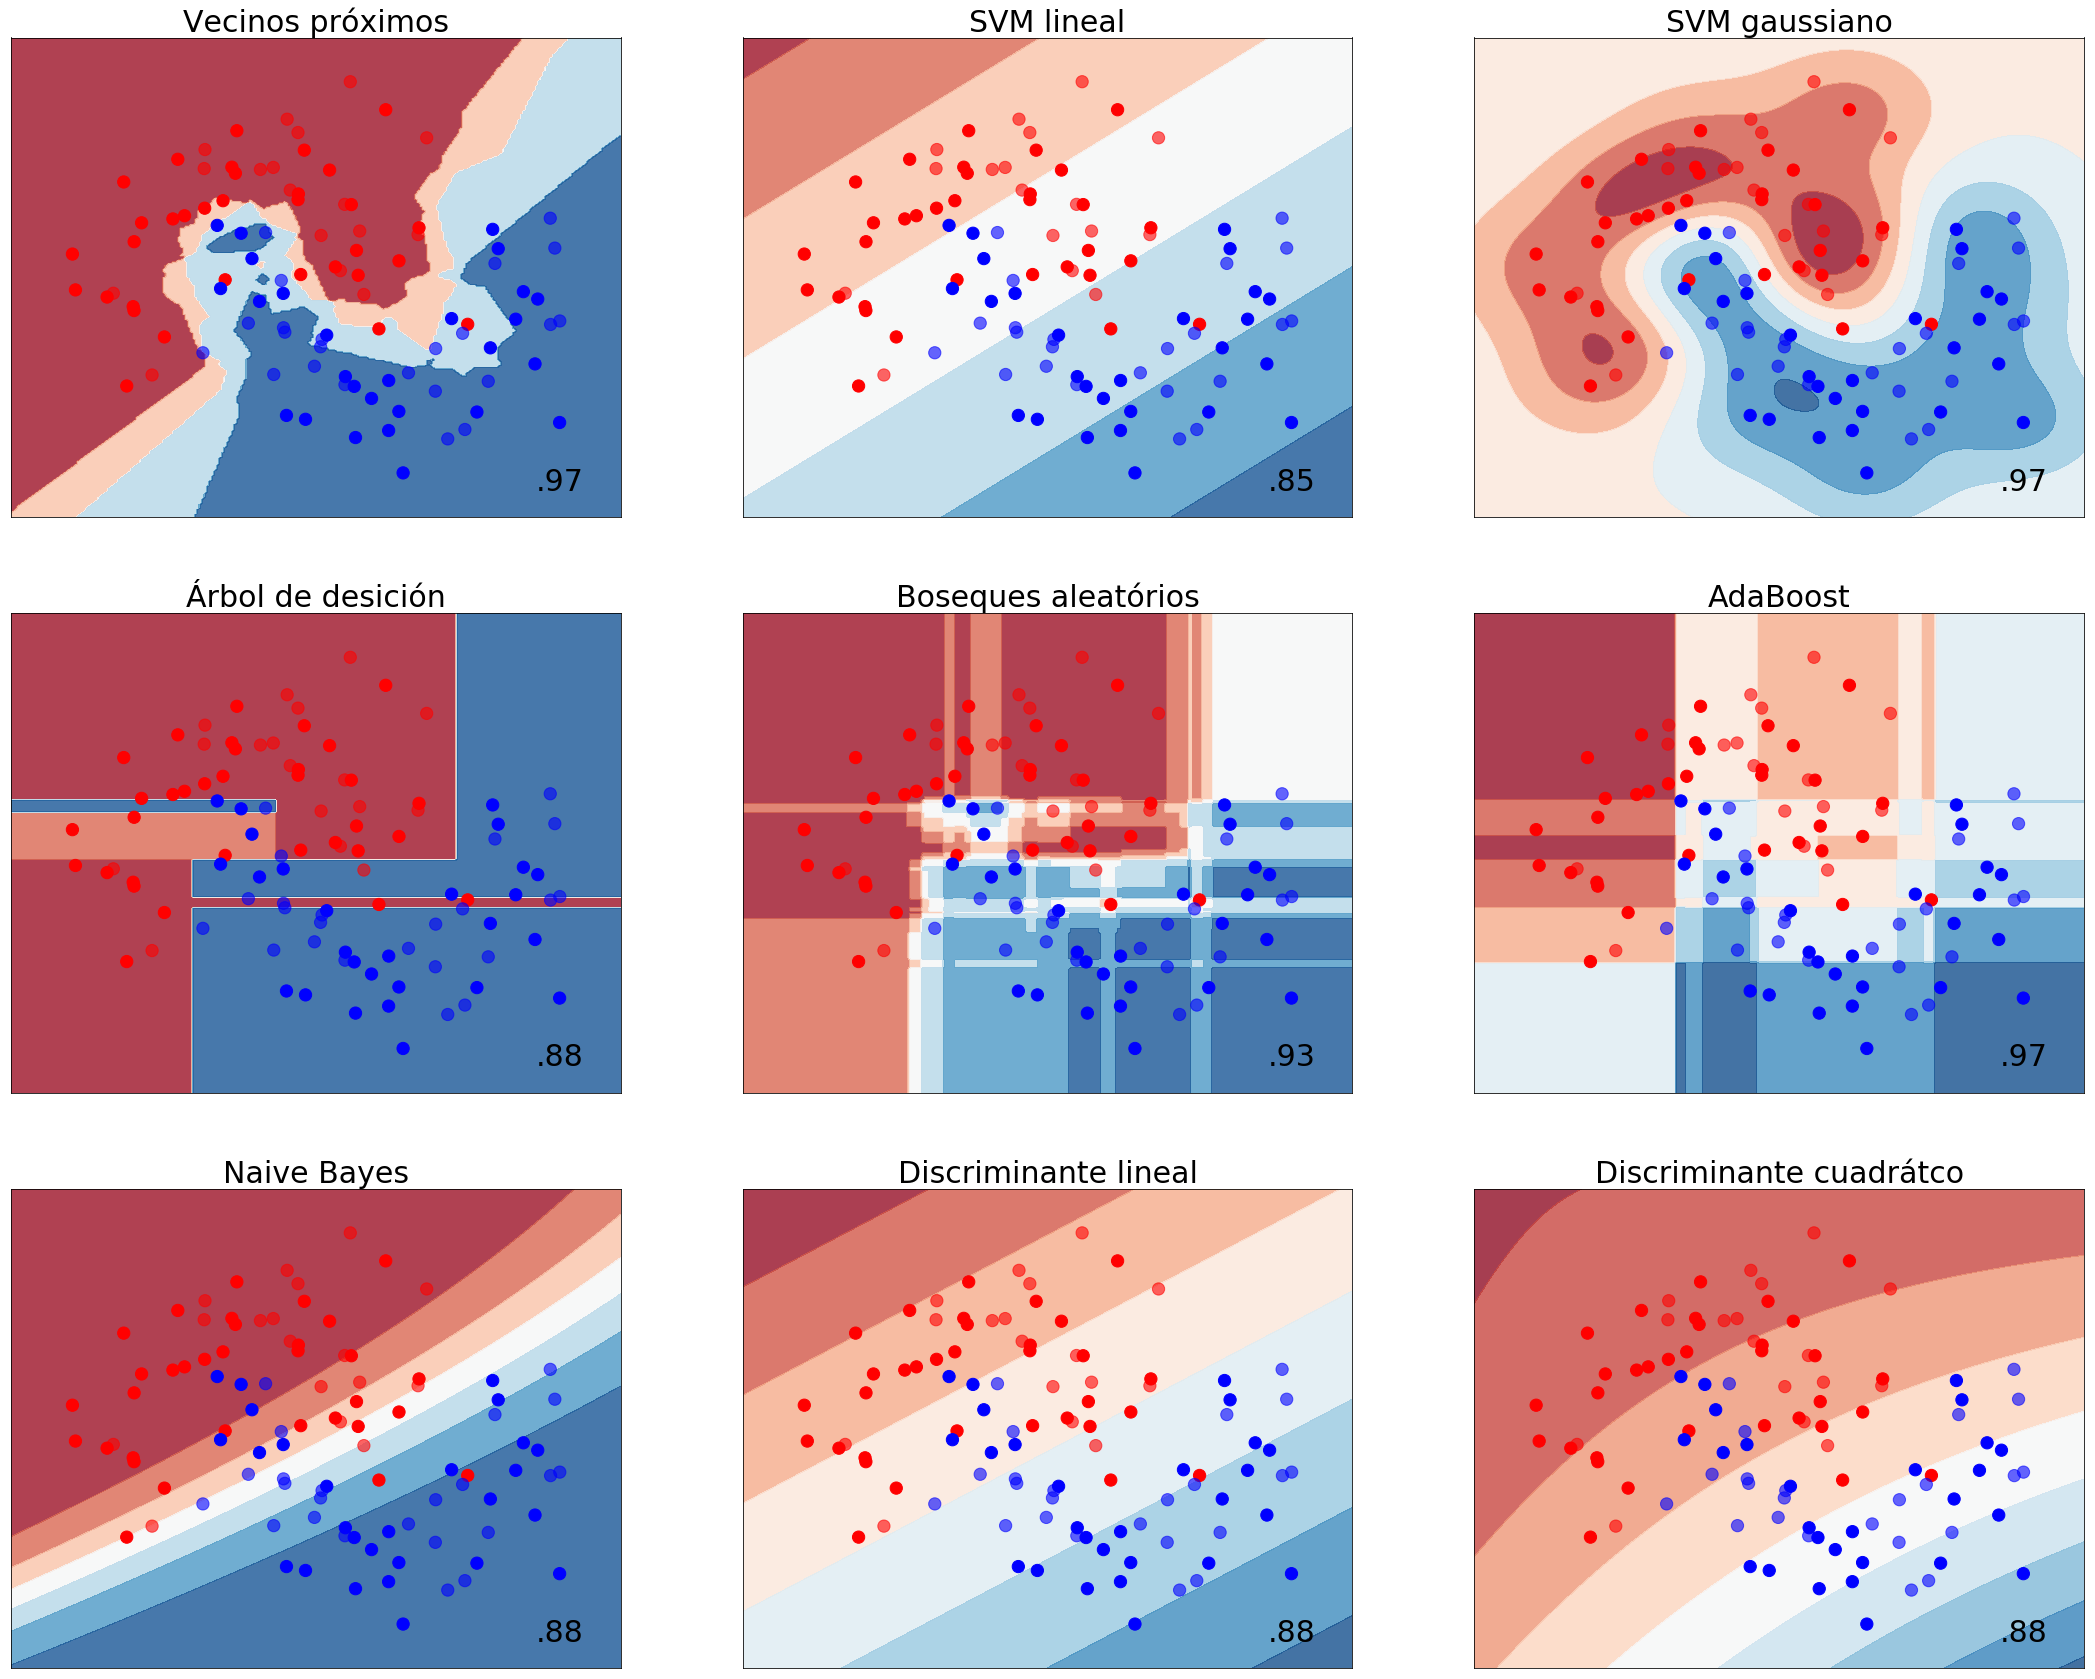

Base de datos 1


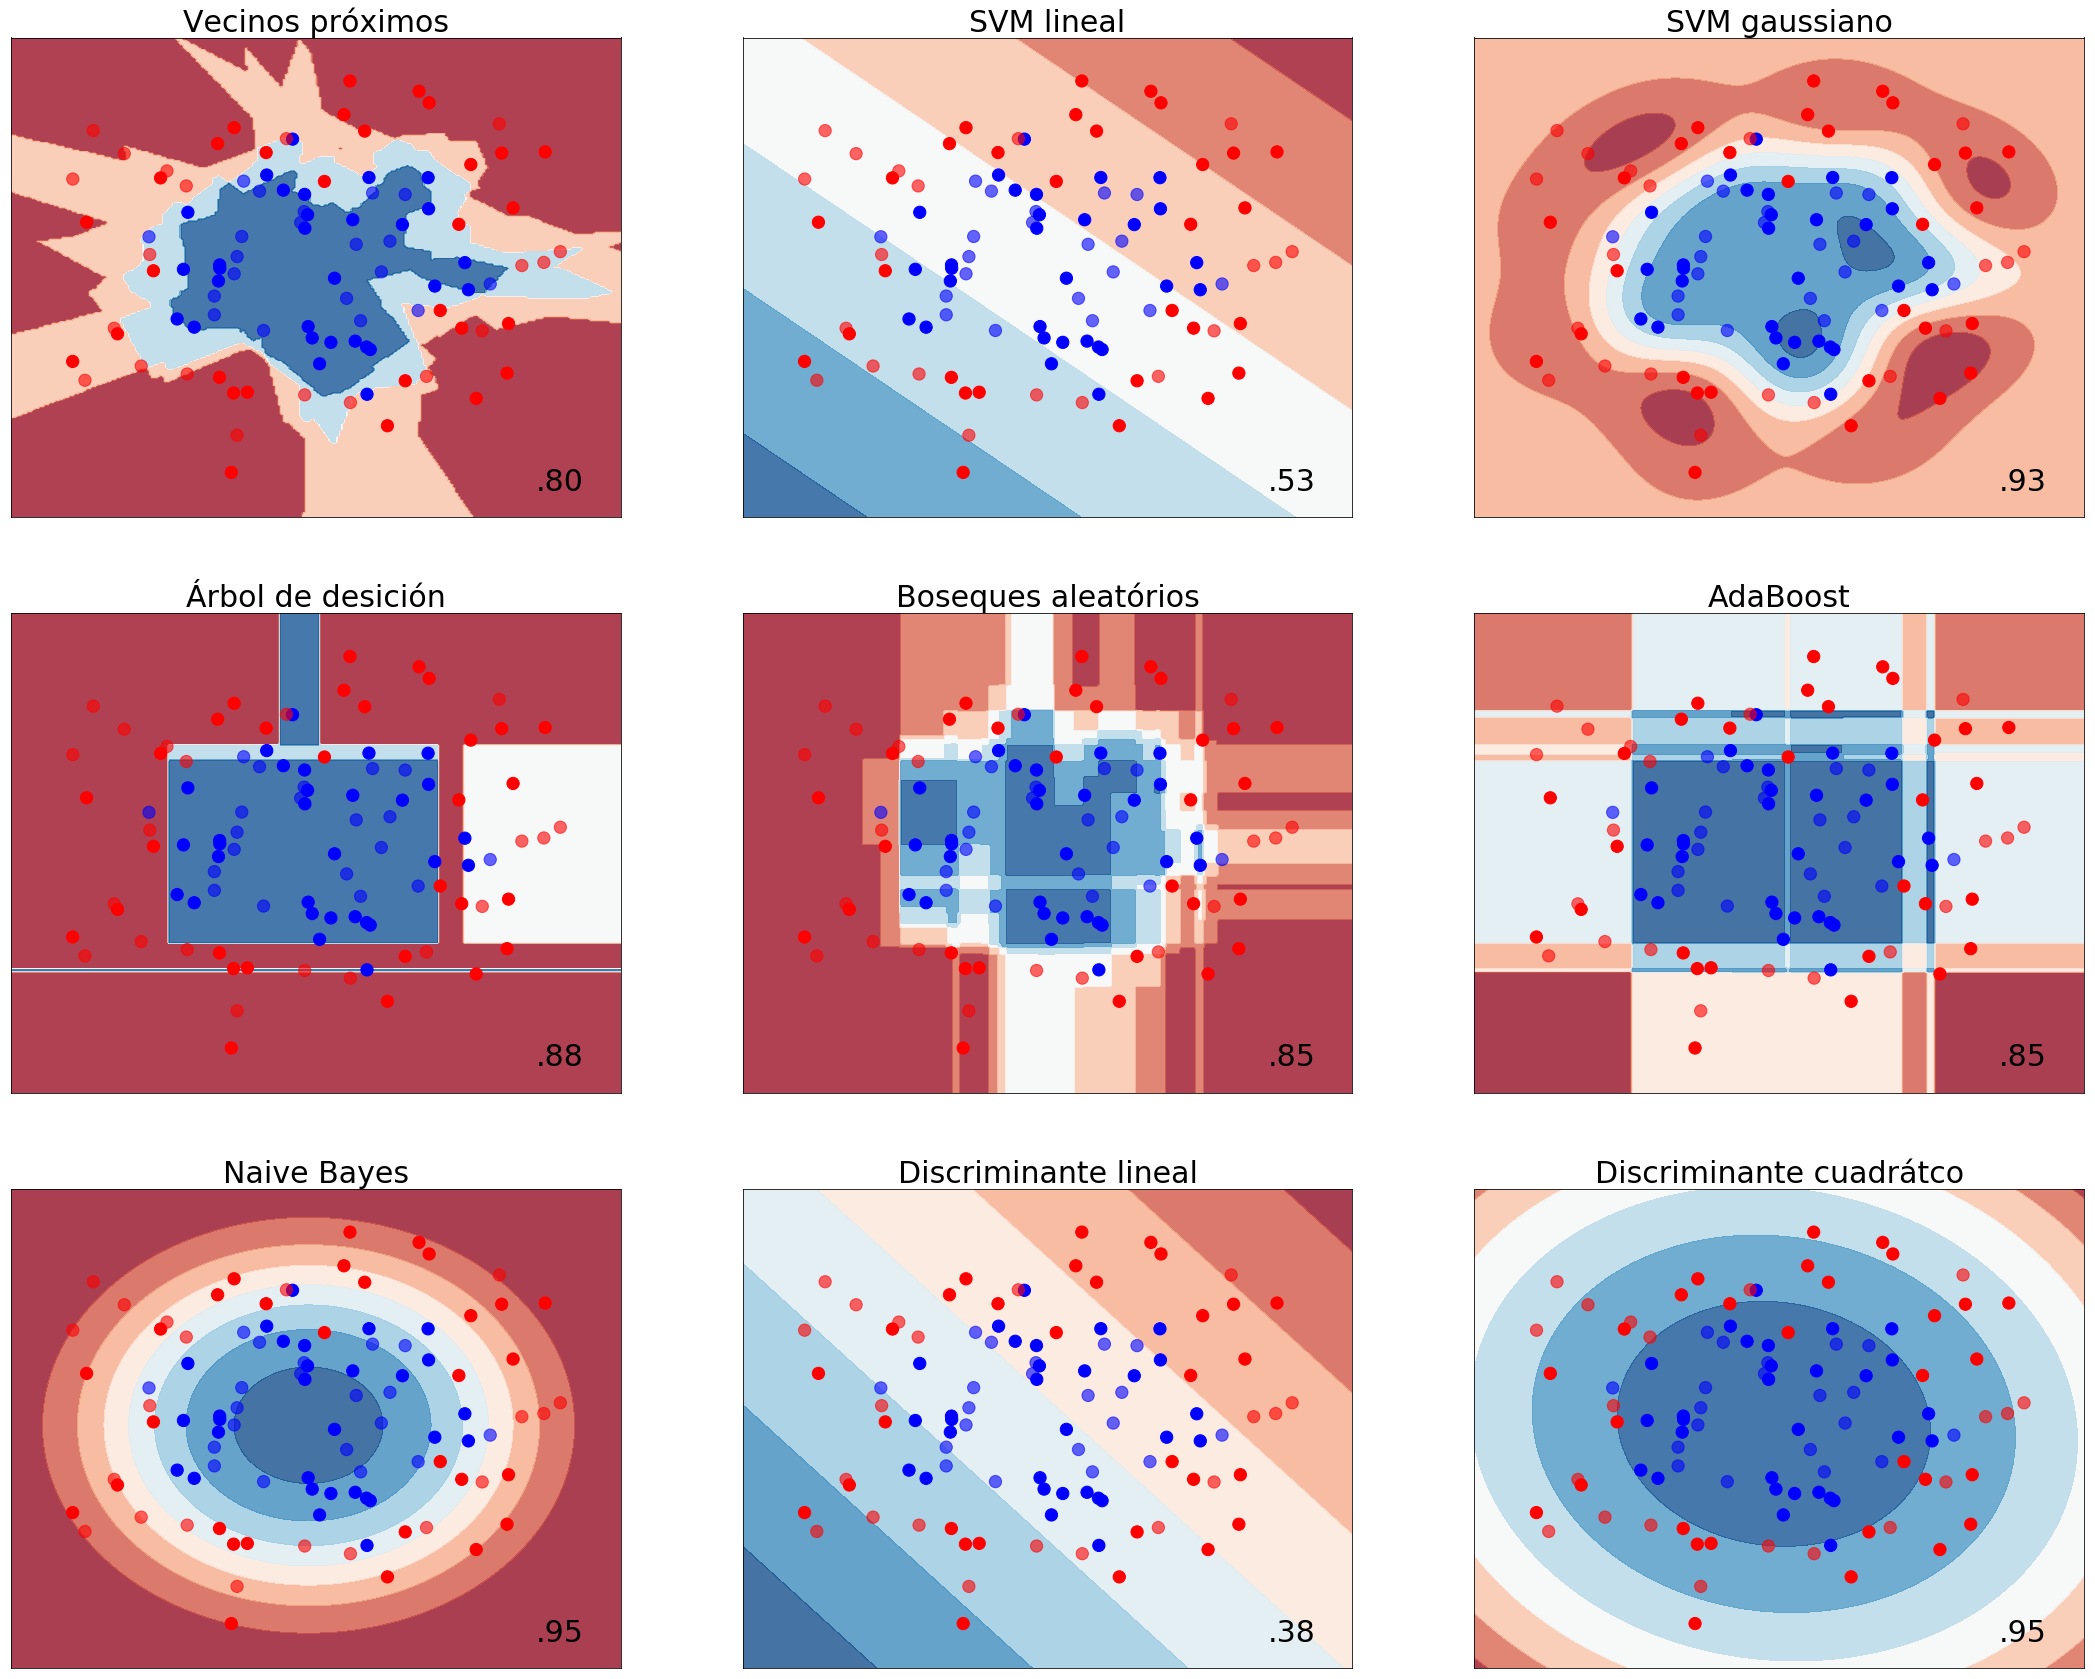

Base de datos 2


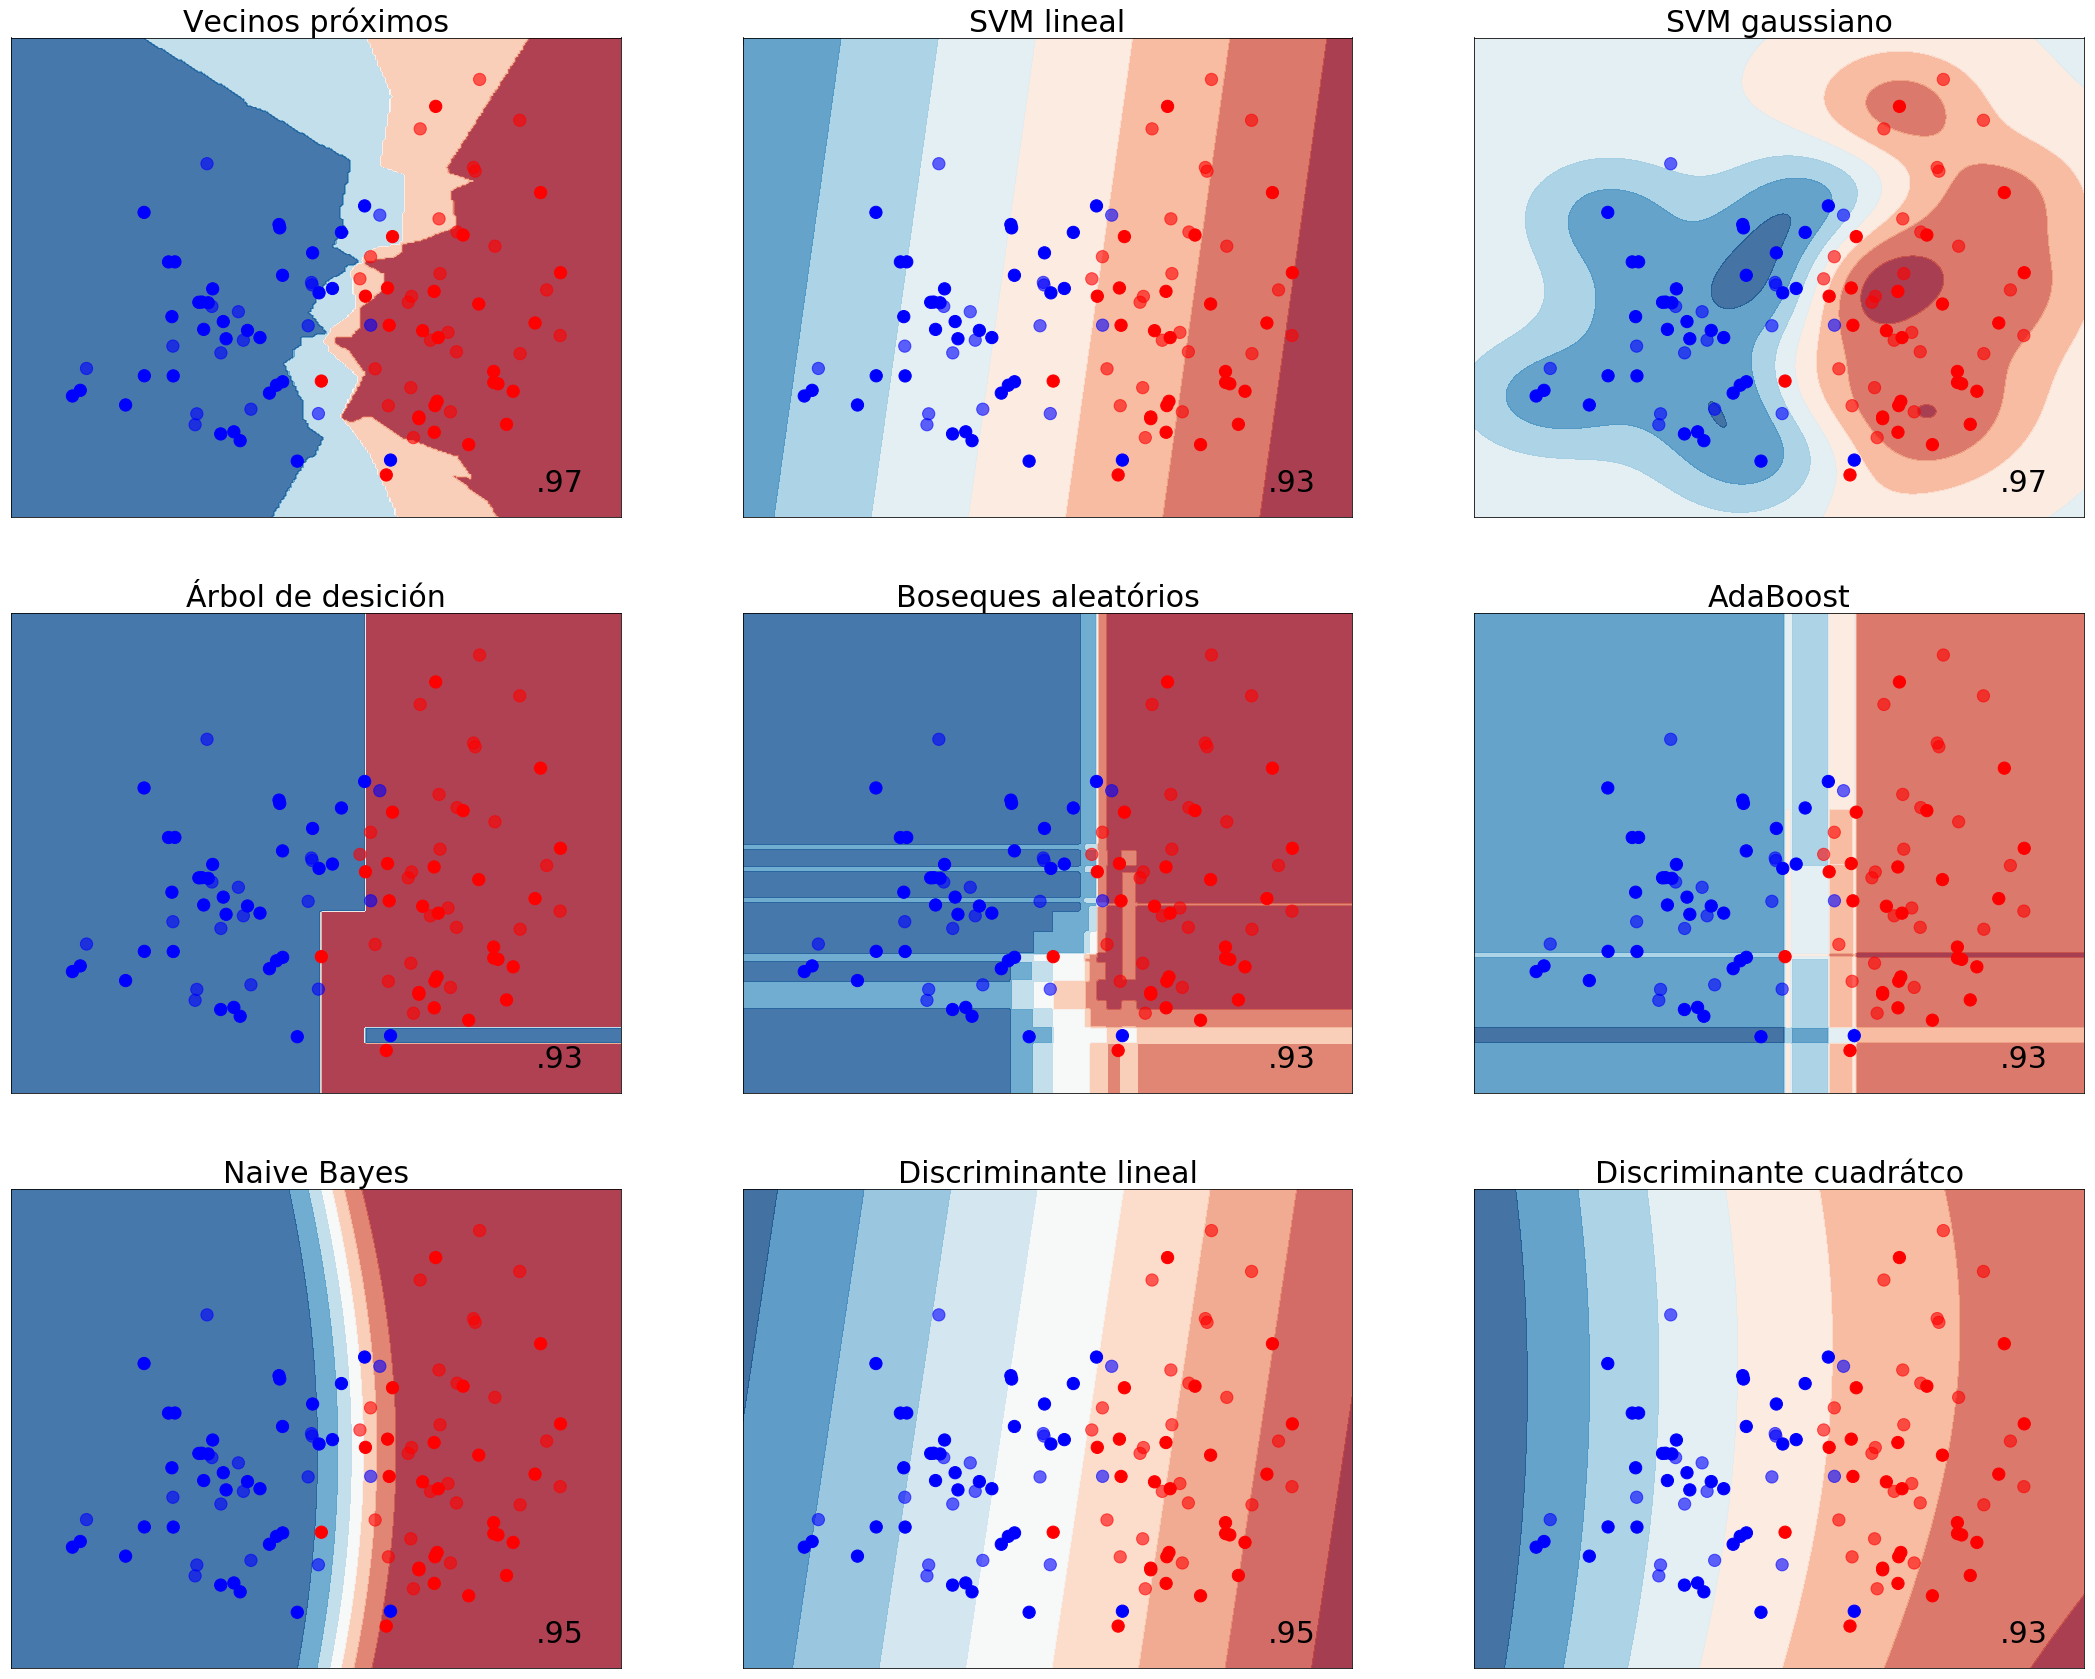

In [4]:
# Colores brillantes
cm = plt.cm.RdBu
cm_escala = ListedColormap(['#FF0000', '#0000FF'])

for (cual, ds) in enumerate(datasets):
    
    print("Base de datos {}".format(cual))
    figure = plt.figure(figsize=(30, 30))

    # Escalar y selecciona valores de entrenamiento y prueba
    X, y = ds
    X = StandardScaler().fit_transform(X)
    
    # Dividir el conjunto en un conjunto de entrenamiento y otro de aprendizaje
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    # Meshgrid para clasificar toda la región y pintar las regiones
    xx, yy = np.meshgrid(np.arange(X[:, 0].min() - .5, X[:, 0].max() + .5, 0.02),
                         np.arange(X[:, 1].min() - .5, X[:, 1].max() + .5, 0.02))

    # Por cada clasificador
    for (i, (titulo, clf)) in enumerate(zip(titulos, classifiers)):
        
        # Escoge el subplot
        ax = plt.subplot(3, 3, i + 1)
        
        # El entrenamiento!!!!
        clf.fit(X_train, y_train)
        
        # Encuentra el error de validación
        score = clf.score(X_test, y_test)

        # Clasifica cada punto en el meshgrid
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)

        # Asigna un color a cada punto
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Grafica los datos de entrenamiento y prueba
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_escala, s=150)
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_escala, s=150, alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(titulo, size=30)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=30, horizontalalignment='right')

    figure.subplots_adjust(left=.02, right=.98)
    plt.show()


##### Playground

Dataset: (array([[ 0.03159499,  0.98698776],
       [ 2.11509784, -0.04624397],
       [ 0.88248972, -0.07575606],
       [-0.0551441 , -0.03733246],
       [ 0.82954503, -0.53932149],
       [ 2.11285708,  0.66208353],
       [ 0.5696927 ,  0.33744136],
       [ 0.95217454, -0.75307471],
       [-0.02922115,  0.39287336],
       [ 1.71579557,  0.36069454],
       [-0.27883014,  0.61420539],
       [ 2.00344509, -0.3091496 ],
       [ 1.50009616, -0.74636376],
       [ 1.22540835,  1.19793017],
       [ 0.46730819,  0.54703192],
       [-0.36653222,  1.11971633],
       [ 0.30124459,  1.23315697],
       [ 0.30430746,  0.82373935],
       [-0.23712492,  0.77876034],
       [ 1.16339832,  0.55290238],
       [-0.59702417,  0.6572361 ],
       [ 0.46356735, -0.1951543 ],
       [ 0.68451111,  0.75287685],
       [ 0.70515699, -0.45892444],
       [-0.65805008, -0.12944211],
       [-0.74662946, -0.3829632 ],
       [ 0.60585226,  0.31252842],
       [ 2.18137168, -0.02291747],
       [ 1

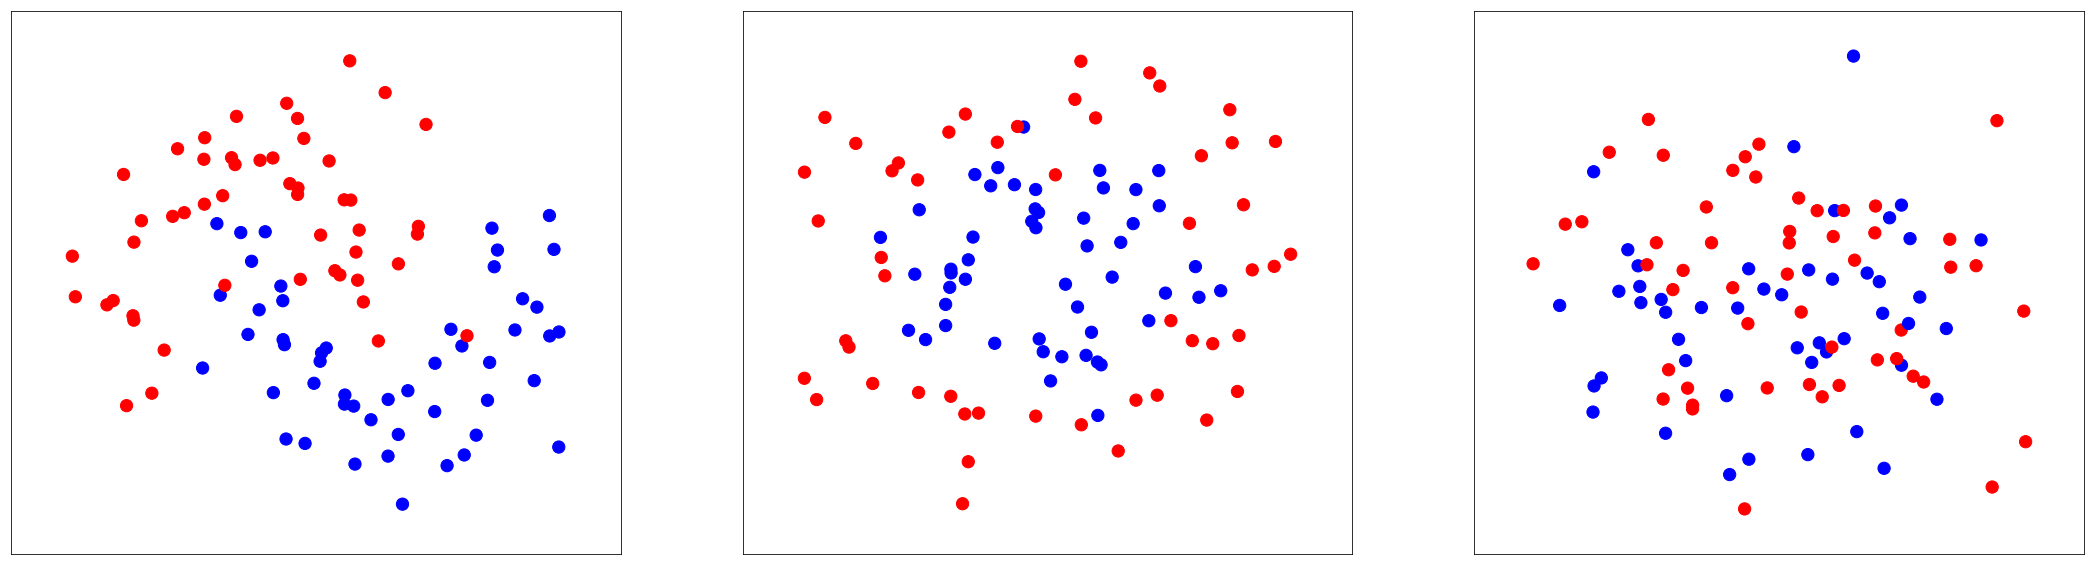

In [10]:
# Del modulo para general conjuntos de datos artificiales, para hacer conjuntos de lunas y circulos:
lunas = make_moons(noise=0.3, random_state=0)
circulos = make_circles(noise=0.2, factor=0.5, random_state=1)

# Ahora generamos un conjunto de datos linealmente separables
## make_classification
# Generate a random n-class classification problem.

X, y = make_classification(n_features= 3,          #   dimensiones para poderlos graficar 
                           n_redundant=0,            #  Sin dimensiones redundantes, no nos interesa probar esto ahora
                           n_informative=2,          #  Las dos dimensiones informativas (no correlacionadas)
                           random_state=1,           #  Semilla, siempre la misma para que todos tengan los mismos resultados
                           n_clusters_per_class=1)   #  Una sola forma por clase para hacerlo más sencillo
#print("X sin ruido: {}".format(X))

# Le agregamos ruido a la separación lineal (algunos puntos mal clasificados)
rng = np.random.RandomState(2)           #  Un generados de números pseudoaleatorios con la semilla impuesta

X += 2 * rng.uniform(size=X.shape)       
#  A cada punto se le suma un error con una distribución uniforme en ambas dimensiones

#print("X con ruido: {}".format(X))

lineal = (X, y) # nuestro dataset de datos linealmente separables

datasets = [lunas, circulos, lineal]    # Una lista de tuplas (X, y)

for data in datasets: # quiero ver mis datos
    print("Dataset: {}".format(data))

# Y los graficamos para verlos

figure = plt.figure(figsize=(30, 10)) # matplotlib si dejas de utilizar una figura, close, para limpiar memoria
cm_escala = ListedColormap(['#FF0000', '#0000FF'])

for (i, ds) in enumerate(datasets):

    # Selecciona los valores del conjunto de datos y los escala
    X, y = ds
    X = StandardScaler().fit_transform(X) 

    # Grafica
    ax = plt.subplot(1, 3, i+1)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=150, cmap=cm_escala)
    ax.set_xlim(X[:, 0].min() - .5, X[:, 0].max() + .5)
    ax.set_ylim(X[:, 1].min() - .5, X[:, 1].max() + .5)
    ax.set_xticks(())
    ax.set_yticks(())
figure.subplots_adjust(left=.02, right=.98)    
plt.show()


Base de datos 0


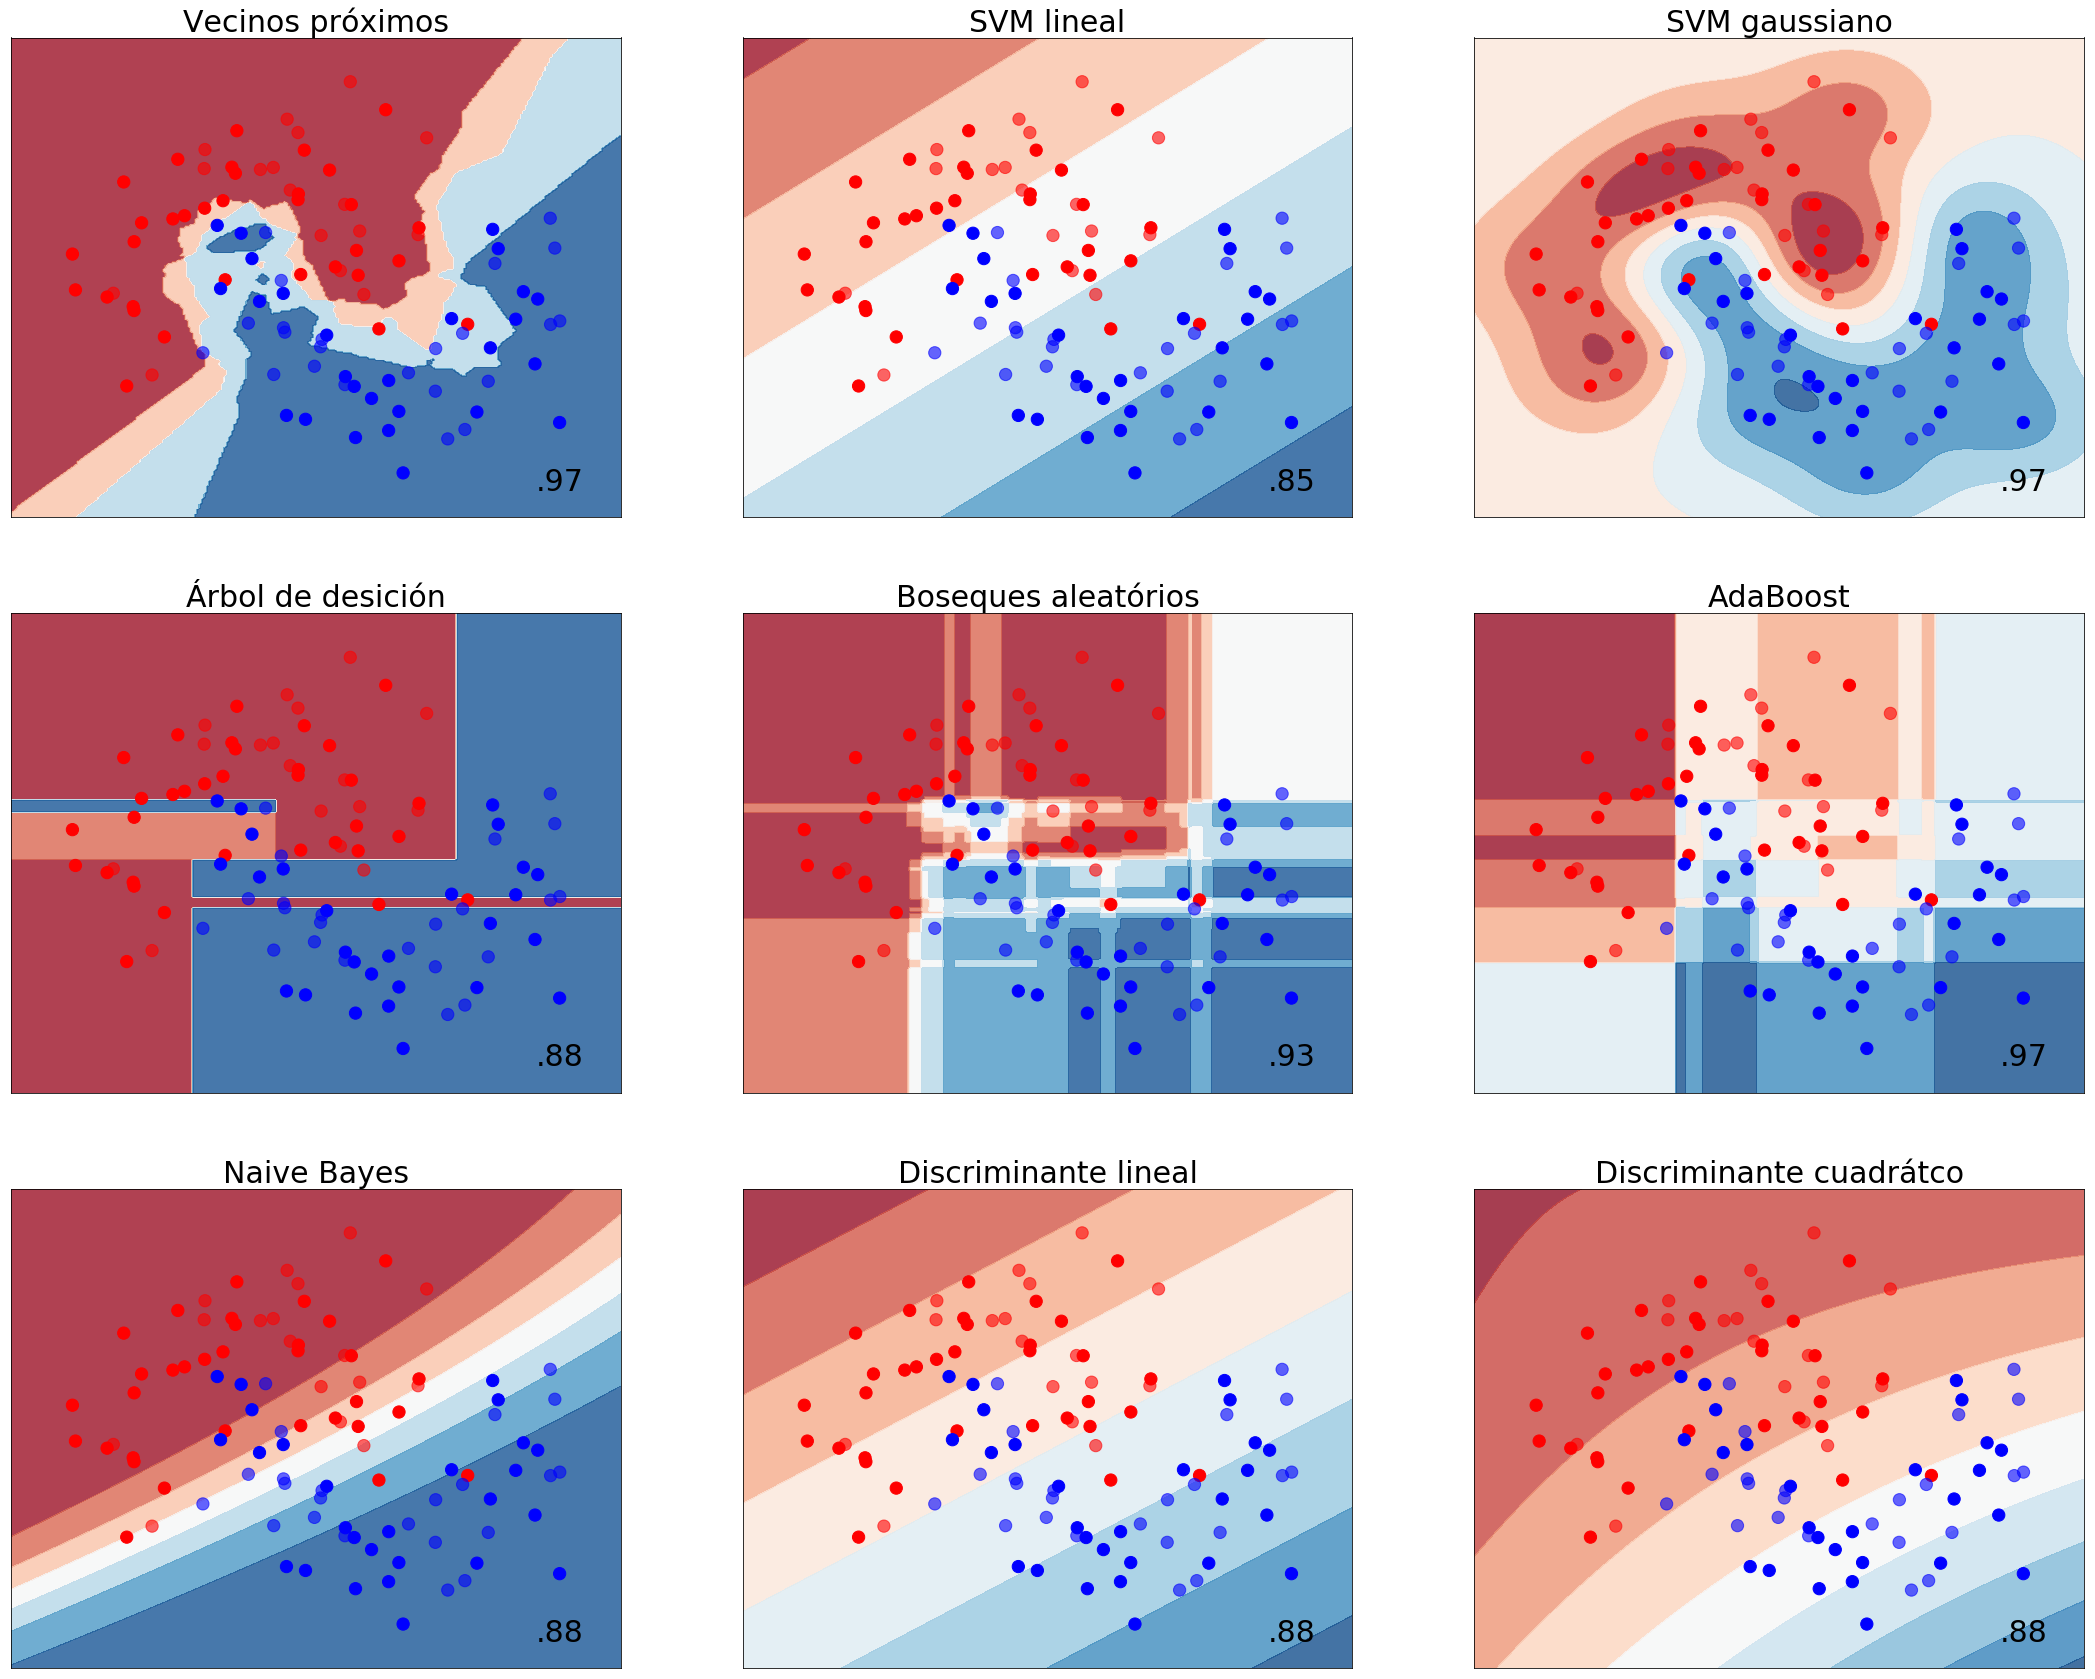

Base de datos 1


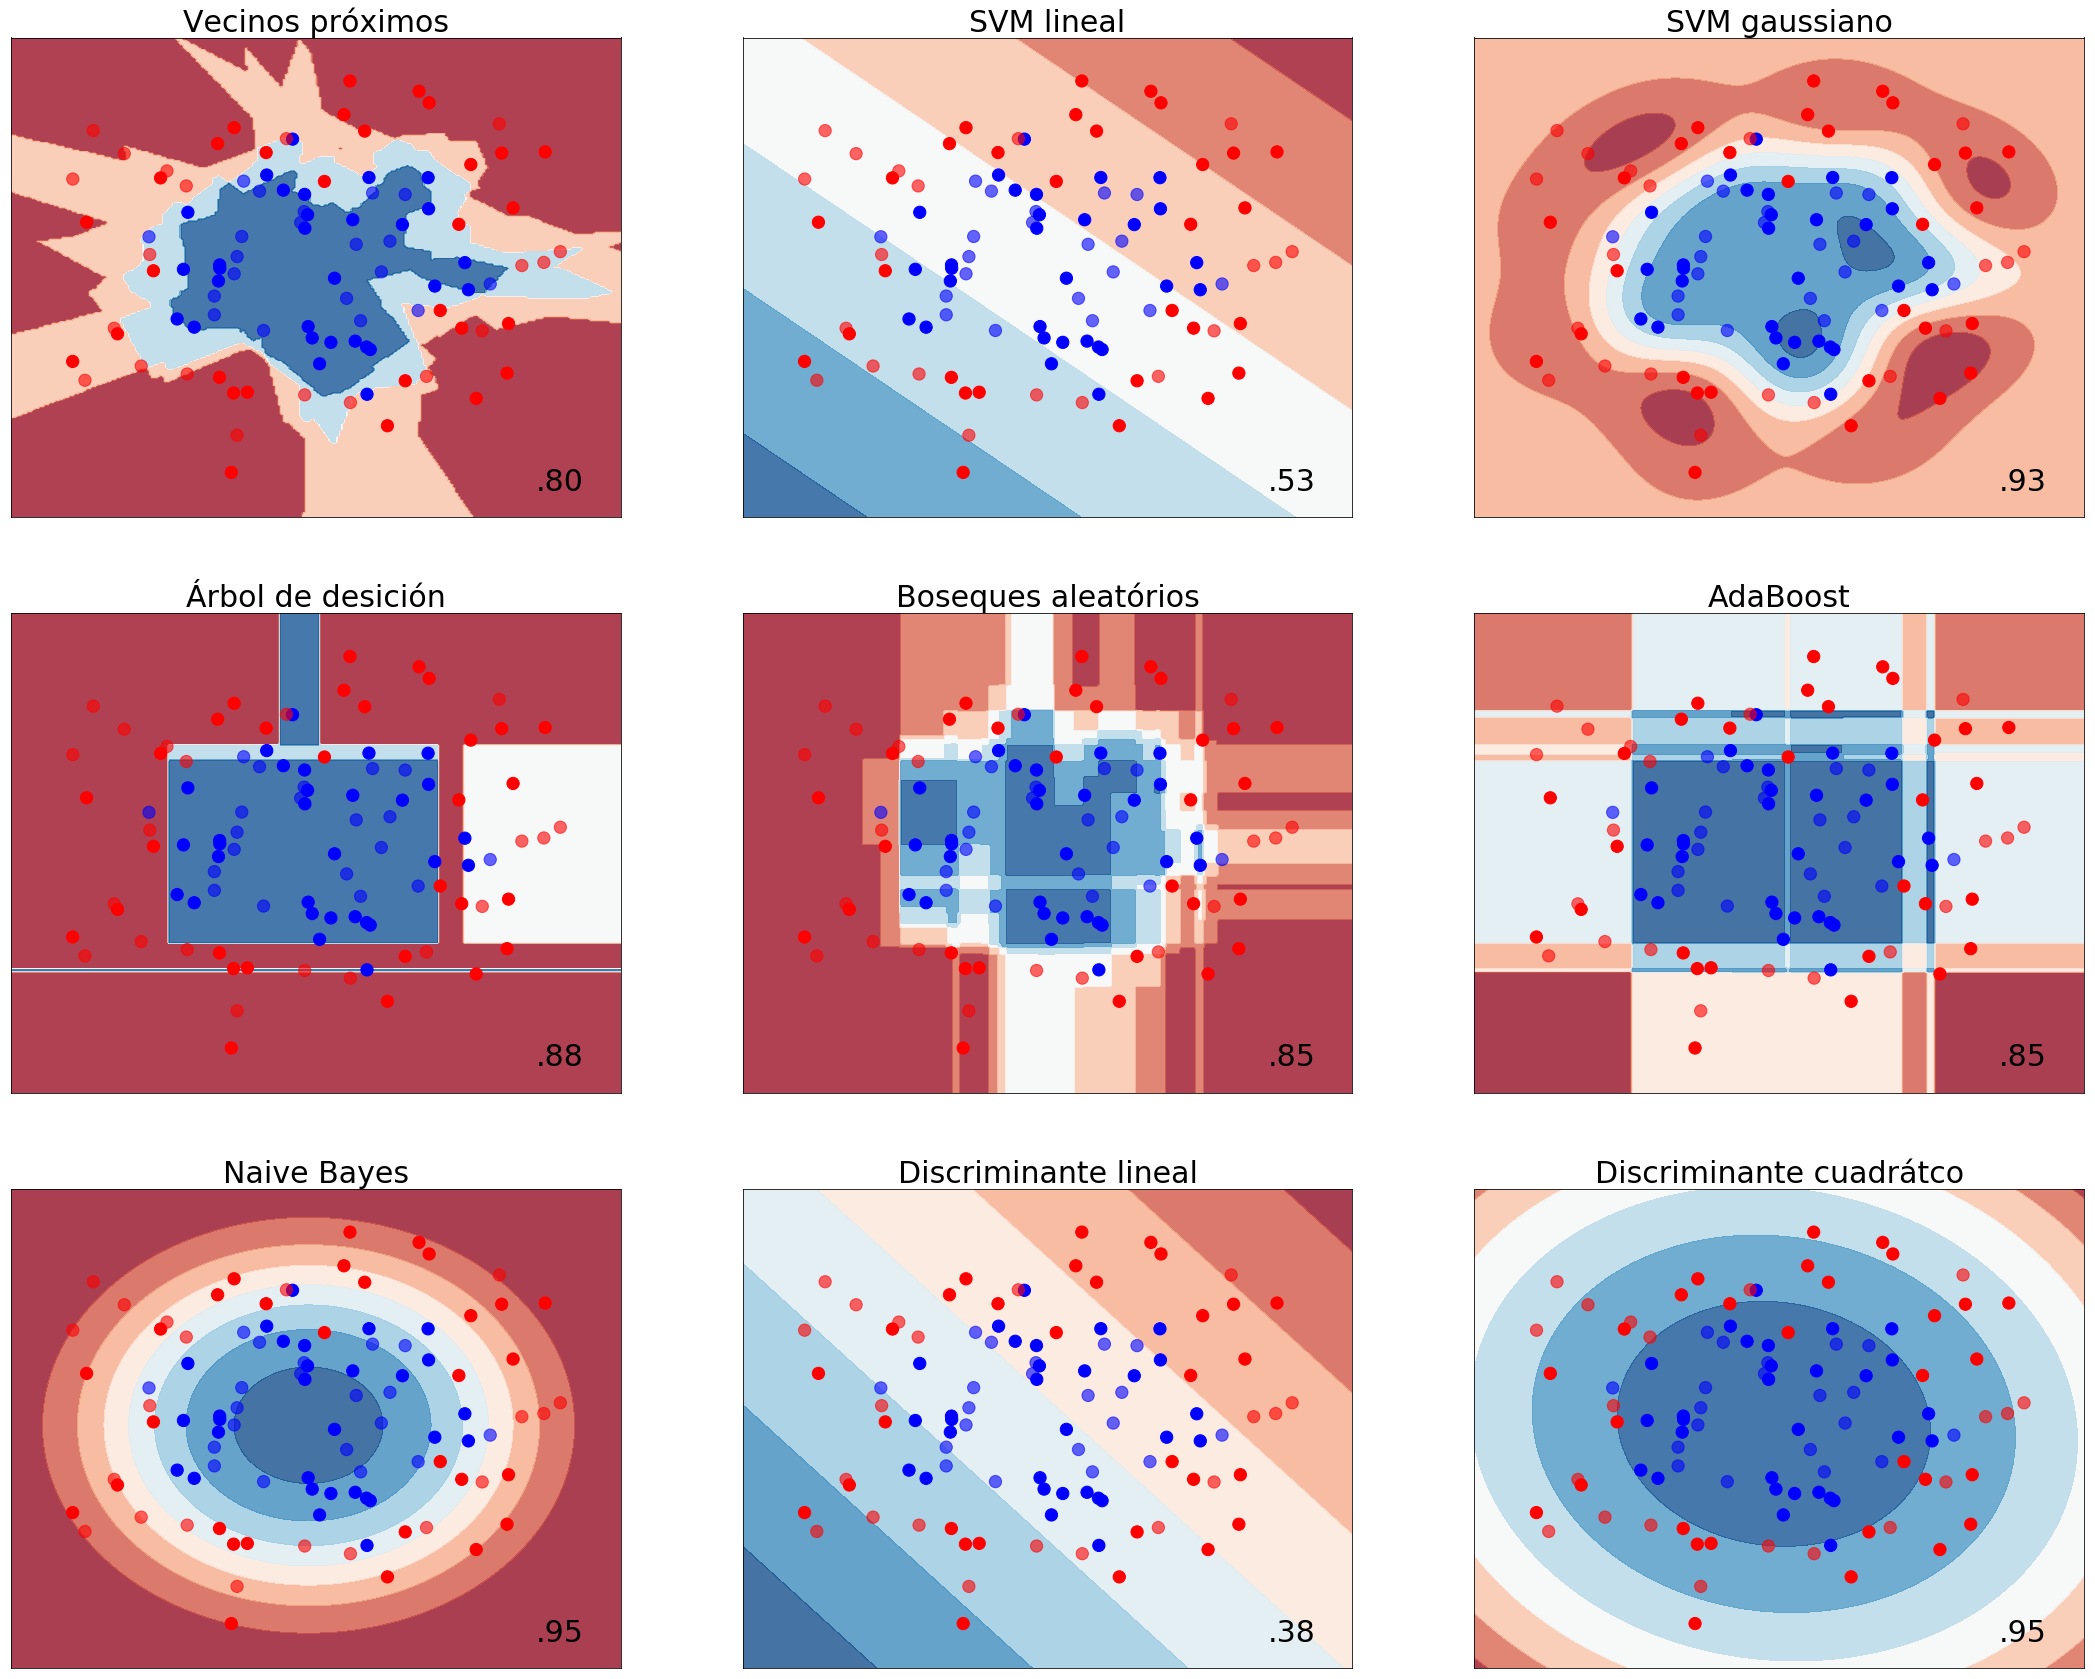

Base de datos 2


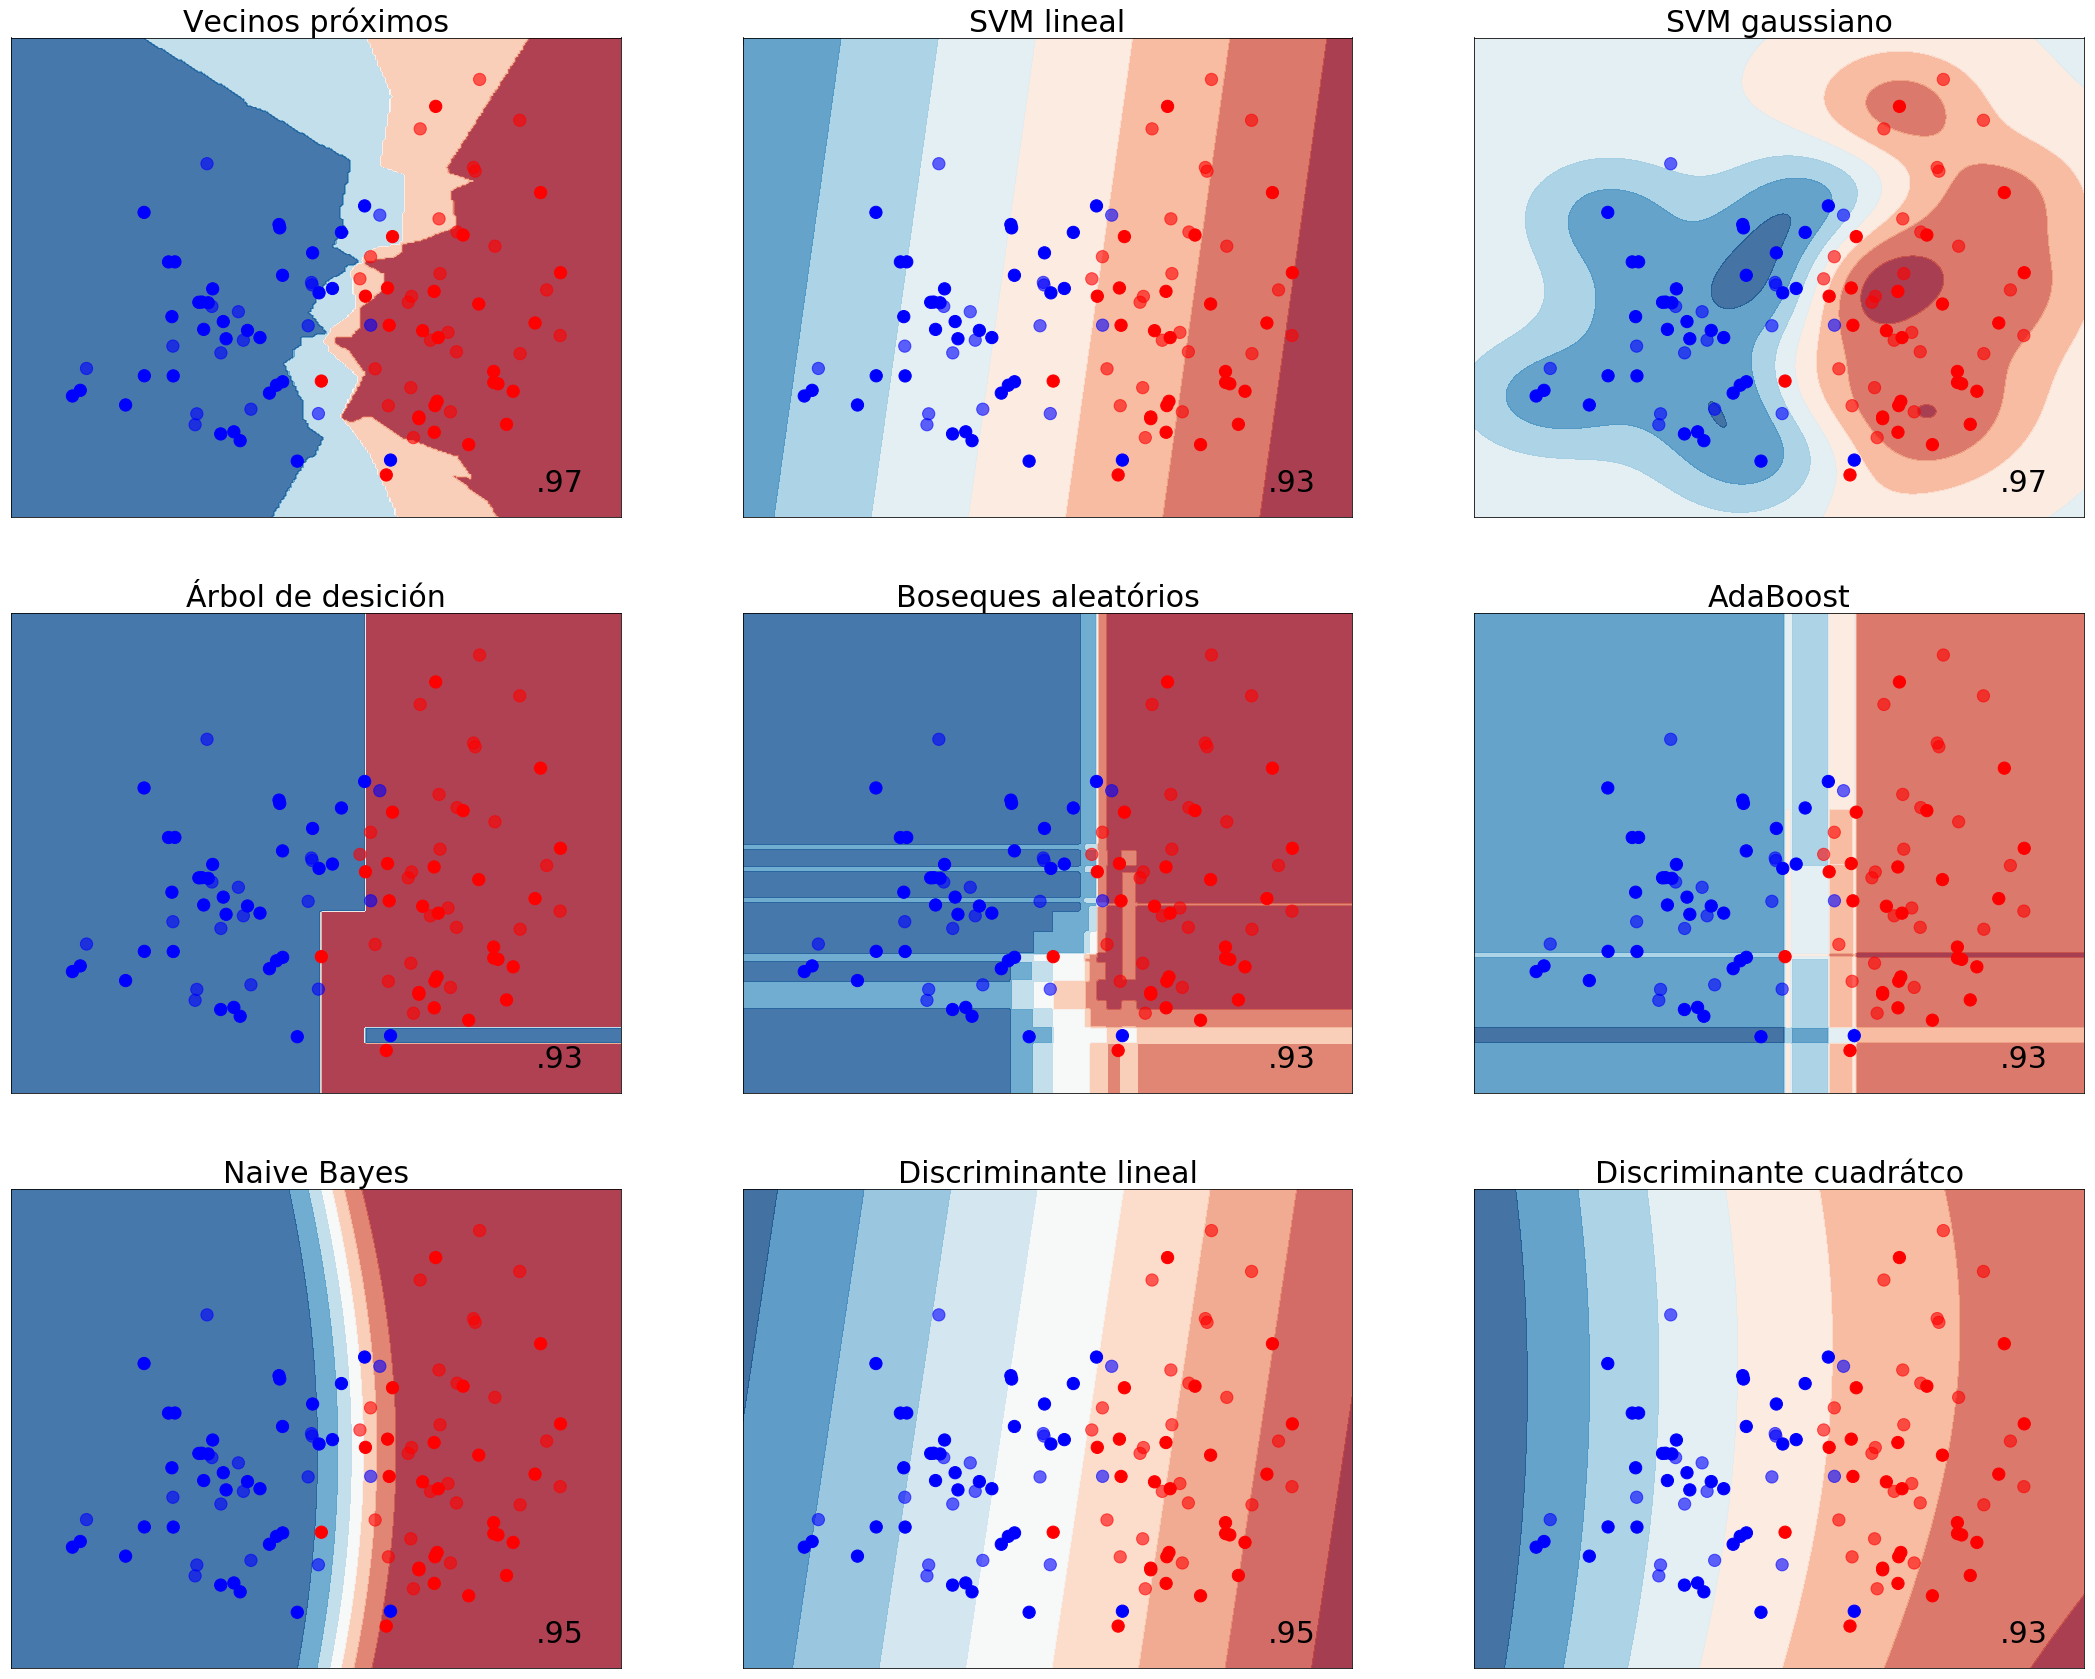

In [4]:
"""Celda para jugar"""
cm = plt.cm.RdBu
cm_escala = ListedColormap(['#FF0000', '#0000FF'])

for (cual, ds) in enumerate(datasets):
    
    print("Base de datos {}".format(cual))
    figure = plt.figure(figsize=(30, 30))

    # Escalar y selecciona valores de entrenamiento y prueba
    X, y = ds
    X = StandardScaler().fit_transform(X)
    
    # Dividir el conjunto en un conjunto de entrenamiento y otro de aprendizaje
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    # Meshgrid para clasificar toda la región y pintar las regiones
    xx, yy = np.meshgrid(np.arange(X[:, 0].min() - .5, X[:, 0].max() + .5, 0.02),
                         np.arange(X[:, 1].min() - .5, X[:, 1].max() + .5, 0.02))

    # Por cada clasificador
    for (i, (titulo, clf)) in enumerate(zip(titulos, classifiers)):
        
        # Escoge el subplot
        ax = plt.subplot(3, 3, i + 1)
        
        # El entrenamiento!!!!
        clf.fit(X_train, y_train)
        
        # Encuentra el error de validación
        score = clf.score(X_test, y_test)

        # Clasifica cada punto en el meshgrid
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)

        # Asigna un color a cada punto
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Grafica los datos de entrenamiento y prueba
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_escala, s=150)
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_escala, s=150, alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(titulo, size=30)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=30, horizontalalignment='right')

    figure.subplots_adjust(left=.02, right=.98)
    plt.show()


## 4. Generando un conjunto de datos en forma de espiral

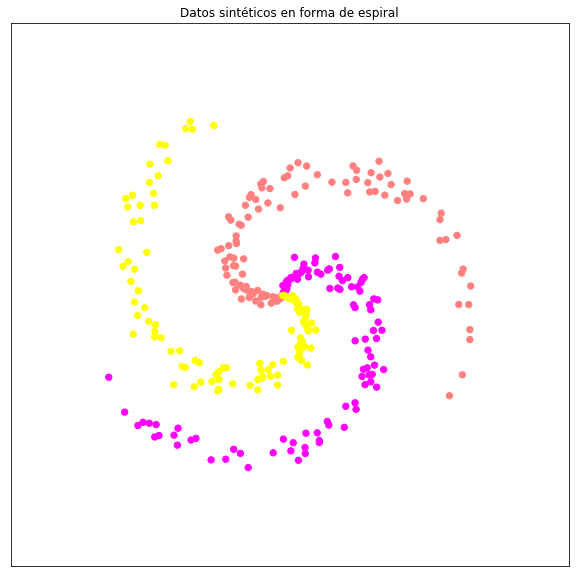

In [12]:
#  Inicialización de datos
np.random.seed(0) # Aseguramos que siempre pasa lo mismo
N = 100 # Ejemplos por clase - cantidad de muestras
D = 2 # Atributos - columnas
K = 3 # Clases - categorias en las que puede caer rojo amarillo morado
X = np.zeros((N * K, D))
Y = np.zeros((N * K, 1), dtype='uint8')

# Genera datos en espiral
for clase in range(K):
    ix = list(range(N*clase, N*(clase+1)))  # Indices para cada clase 
# por que hay variables rojas?
    r = np.linspace(0.0, 1, N) 
    t = np.linspace(clase * 4, (clase + 1) * 4, N) + np.random.randn(N) * 0.2
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    Y[ix] = clase


#  Grafica datos
figure = plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.spring)
plt.title("Datos sintéticos en forma de espiral")
plt.xlim(X[:, 0].min() - .5, X[:, 0].max() + .5)
plt.ylim(X[:, 1].min() - .5, X[:, 1].max() + .5)
plt.xticks(())
plt.yticks(())
plt.show()




### Ejercicio:

Prueba los diferentes clasificadores para este conjunto de datos. Recuerda que en este caso tenemos un problema de múltiples clases y los métodos podrían necesitar un ajuste especial. Clasifica un grid con los puntos que permitan estudiar la forma de la partición del esacio, tal como se hizo en el ejemplo.

Revisa la literatura de cada método en caso que no funcionen directamente. Agrega a continuación el código que genera las gráficas.

#### Bateria de Clasificadores para el problema en espiral

In [6]:
# Agrega aqui tu códgo

titulos = [u"Vecinos próximos", "SVM lineal", "SVM gaussiano", u"Árbol de desición",
           u"Boseques aleatórios", "AdaBoost", "Naive Bayes", "Discriminante lineal",
           "Discriminante cuadrátco"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()
]


#### Aprendiendo a clasificar

In [27]:
x_lineal, y_lineal = lineal
#print("Imprimiendo nuestra Y del conjunto lineal: ".format(y_lineal))
#print("Imprimiendo nuestra Y de la espiral: {}".format(Y))
# tranformemos nuestra y a una aceptabble
print(Y.T[0])
# entonces


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


Base de datos ESPIRAL
Clasificador que tiene decision_function: SVM lineal


ValueError: cannot reshape array of size 219474 into shape (267,274)

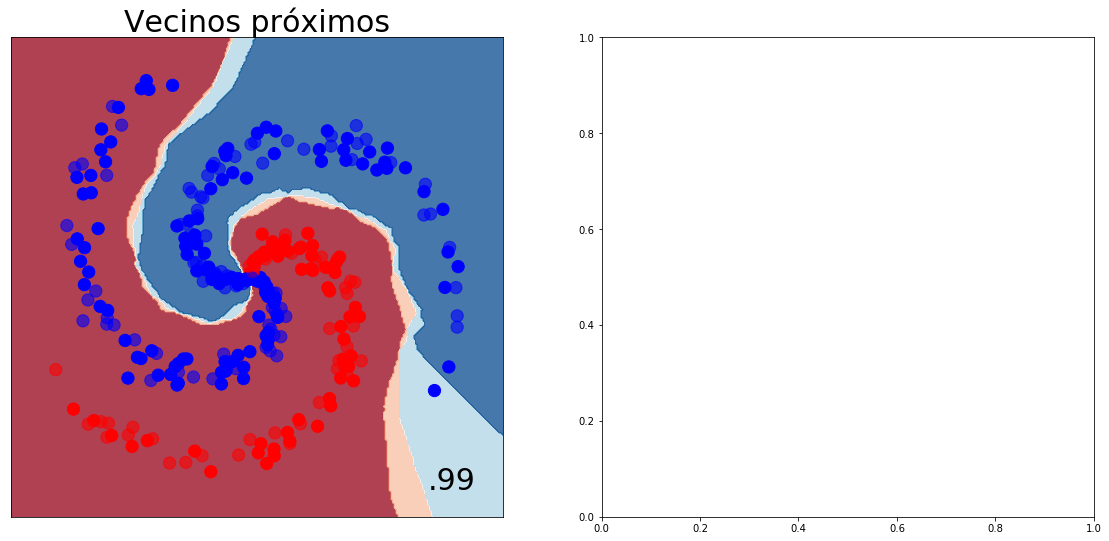

In [29]:
"""Celda para jugar"""
cm = plt.cm.RdBu
cm_escala = ListedColormap(['#FF0000', '#0000FF'])

#for (cual, ds) in enumerate(datasets):
ds = X, Y.T[0] # guardamos el dataset,
# tenemos que transponer Y para que entre en los clasificadores como vector no como columna

print("Base de datos ESPIRAL")
figure = plt.figure(figsize=(30, 30))

# Escalar y selecciona valores de entrenamiento y prueba
X, y = ds
X = StandardScaler().fit_transform(X)

# Dividir el conjunto en un conjunto de entrenamiento y otro de aprendizaje
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

# Meshgrid para clasificar toda la región y pintar las regiones
xx, yy = np.meshgrid(np.arange(X[:, 0].min() - .5, X[:, 0].max() + .5, 0.02),
                     np.arange(X[:, 1].min() - .5, X[:, 1].max() + .5, 0.02))

# Por cada clasificador
for (i, (titulo, clf)) in enumerate(zip(titulos, classifiers)):

    # Escoge el subplot
    ax = plt.subplot(3, 3, i + 1)

    # El entrenamiento!!!!
    clf.fit(X_train, y_train)

    # Encuentra el error de validación
    score = clf.score(X_test, y_test)

    # Clasifica cada punto en el meshgrid
    # hasattr, True : object tiene "atributt"  ; False : else
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        print("Clasificador que tiene decision_function: {}".format(titulo))
        # al imprimir la primer salida 
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        
    Z = Z.reshape(xx.shape) # error 1, cannot reshape array of size 219474 into shape (267,274)
    
    
    # Asigna un color a cada punto
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Grafica los datos de entrenamiento y prueba
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_escala, s=150)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_escala, s=150, alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(titulo, size=30)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=30, horizontalalignment='right')

figure.subplots_adjust(left=.02, right=.98)
plt.show()


## Conclusiones

### Ejercicio:

Escribe a continuación tus conlusiones, agreando lo siguiente:

1. Para cada clasificador, ¿Como es la partición del espacio que genera?
2. ¿Para que casos crees que son mejores unos clasificadores a otros?
3. Existen clasificadores que se comporten más o menos parecido? ¿Los podrías regrupar?
4. ¿Hay algún clasificador que, vista la evidencia, ni siquiera probarías al principio? ¿Cúal(es? ¿Porqué?
